<div class="alert alert-block alert-warning">
<h3>
    Final Project 
    <br>
    <br></h3>
<h1><center>Pengelompokan Startup berdasarkan faktor berapa kali didanai, besaran dana, kategori pendanaan, dan lokasi kantor</h1>
    <br></center>
    <h2>Muhamad Ariyanda Putra<br></h2>
    <h3>Purwadhika Data Science Bekasi</h3>

<div class="alert alert-block alert-success">
</div>

### Data : Startup Investments
### topics : Venture deals, organizations, people and exits
### by : Justinas Cirtautas

<div class="alert alert-block alert-success">
</div>

<div class="alert alert-block alert-info">
    <h1> 2nd Step: Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [9]:
funding = pd.read_csv('funding_timeseries_clean.csv')

In [2]:
STARTUP_DF = pd.read_pickle('STARTUP_DF_FINAL.pkl')

In [23]:
sns.set(style='darkgrid')

In [46]:
pd.set_option('display.max_columns', None)
STARTUP_DF

,STARTUP_ID,FUND_DATE,MIN_DATE,MAX_DATE,FUND_TYPE,FUND_COUNT,RAISED_USD,MIN_FUND_USD,MAX_FUND_USD,RAISED_USD_SUM,RAISED_USD_MEAN,SERIES A,SERIES B,SERIES C+,ANGEL,VENTURE,POST IPO,OTHER,LATITUDE,LONGITUDE,COUNTRY_CODE,COUNTRY_CODE_NO,Cluster
0,c:172767,[2000-01-01T00:00:00.000000000],2000-01-01,2000-01-01,[series-a],1,[5000000.0],5000000.0,5000000.0,5000000.0,5000000.0,1,0,0,0,0,0,0,38.985049,-77.088661,USA,0,1
1,c:172767,[2000-01-01T00:00:00.000000000],2000-01-01,2000-01-01,[series-a],1,[5000000.0],5000000.0,5000000.0,5000000.0,5000000.0,1,0,0,0,0,0,0,37.789752,-122.399396,USA,0,1
2,c:67397,[2000-01-01T00:00:00.000000000],2000-01-01,2000-01-01,[series-a],1,[2000000.0],2000000.0,2000000.0,2000000.0,2000000.0,1,0,0,0,0,0,0,0.000000,0.000000,USA,0,1
3,c:19586,[2000-01-01T00:00:00.000000000],2000-01-01,2000-01-01,[series-a],1,[2000000.0],2000000.0,2000000.0,2000000.0,2000000.0,1,0,0,0,0,0,0,43.447727,-1.555580,FRA,1,1
4,c:9009,[2000-01-01T00:00:00.000000000],2000-01-01,2000-01-01,[angel],1,[1356210.0],1356210.0,1356210.0,1356210.0,1356210.0,0,0,0,1,0,0,0,41.907696,12.496985,ITA,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25077,c:286125,[2013-12-12T00:00:00.000000000],2013-12-12,2013-12-12,[series-a],1,[4350000.0],4350000.0,4350000.0,4350000.0,4350000.0,1,0,0,0,0,0,0,0.000000,0.000000,USA,0,1
25078,c:286178,[2013-12-12T00:00:00.000000000],2013-12-12,2013-12-12,[series-b],1,[17000000.0],17000000.0,17000000.0,17000000.0,17000000.0,0,1,0,0,0,0,0,0.000000,0.000000,USA,0,2
25079,c:286145,[2013-12-12T00:00:00.000000000],2013-12-12,2013-12-12,[venture],1,[151525.0],151525.0,151525.0,151525.0,151525.0,0,0,0,0,1,0,0,0.000000,0.000000,GBR,6,2
25080,c:286151,[2013-12-12T00:00:00.000000000],2013-12-12,2013-12-12,[series-a],1,[1969827.0],1969827.0,1969827.0,1969827.0,1969827.0,1,0,0,0,0,0,0,0.000000,0.000000,GBR,6,1


In [139]:
STARTUP_DF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25080 entries, 0 to 25081
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   STARTUP_ID       25080 non-null  object        
 1   FUND_DATE        25080 non-null  object        
 2   MIN_DATE         25080 non-null  datetime64[ns]
 3   MAX_DATE         25080 non-null  datetime64[ns]
 4   FUND_TYPE        25080 non-null  object        
 5   FUND_COUNT       25080 non-null  int64         
 6   RAISED_USD       25080 non-null  object        
 7   MIN_FUND_USD     25080 non-null  float64       
 8   MAX_FUND_USD     25080 non-null  float64       
 9   RAISED_USD_SUM   25080 non-null  float64       
 10  RAISED_USD_MEAN  25080 non-null  float64       
 11  SERIES A         25080 non-null  int64         
 12  SERIES B         25080 non-null  int64         
 13  SERIES C+        25080 non-null  int64         
 14  ANGEL            25080 non-null  int64

In [140]:
STARTUP_DF_INFO = pd.DataFrame()

In [141]:
STARTUP_DF_INFO_COL = STARTUP_DF.drop(['STARTUP_ID','FUND_DATE','FUND_TYPE','RAISED_USD','SERIES A','SERIES B','SERIES C+','ANGEL','VENTURE','POST IPO','OTHER','LATITUDE','LONGITUDE','COUNTRY_CODE_NO'],axis=1)

INFO = []

for i in STARTUP_DF_INFO_COL.columns:
    temp = []
    temp.append(i)
    temp.append(STARTUP_DF_INFO_COL[i].isnull().sum())
    temp.append(STARTUP_DF_INFO_COL[i].nunique())
    temp.append(STARTUP_DF_INFO_COL[i].unique())
    INFO.append(temp)

In [142]:
for i in range(len(INFO)):
    STARTUP_DF_INFO[STARTUP_DF_INFO_COL.columns[i]] = INFO[i]

In [143]:
STARTUP_DF_INFO = STARTUP_DF_INFO.drop(0)

In [144]:
STARTUP_DF_INFO = STARTUP_DF_INFO.T.rename(columns={1:'NULL',2:'NUNIQUE',3:'UNIQUE'})

In [145]:
STARTUP_DF_INFO

,NULL,NUNIQUE,UNIQUE
MIN_DATE,0,2850,"[2000-01-01T00:00:00.000000000, 2000-02-01T00:..."
MAX_DATE,0,2723,"[2000-01-01T00:00:00.000000000, 2003-01-01T00:..."
FUND_COUNT,0,5,"[1, 3, 2, 4, 5]"
MIN_FUND_USD,0,5216,"[5000000.0, 2000000.0, 1356210.0, 500000.0, 65..."
MAX_FUND_USD,0,5312,"[5000000.0, 2000000.0, 1356210.0, 500000.0, 65..."
RAISED_USD_SUM,0,6613,"[5000000.0, 2000000.0, 1356210.0, 500000.0, 65..."
RAISED_USD_MEAN,0,6896,"[5000000.0, 2000000.0, 1356210.0, 500000.0, 65..."
COUNTRY_CODE,0,123,"[USA, FRA, ITA, BEL, NLD, DEU, GBR, CHE, BRA, ..."


In [146]:
STARTUP_DF[['MIN_FUND_USD','MAX_FUND_USD', 'RAISED_USD_SUM', 'RAISED_USD_MEAN']].describe().T[['min','mean','max']]

,min,mean,max
MIN_FUND_USD,1000.0,3.998912e+06,300000000.0
MAX_FUND_USD,1000.0,5.030365e+06,300000000.0
RAISED_USD_SUM,1000.0,5.878975e+06,300000000.0
RAISED_USD_MEAN,1000.0,4.498512e+06,300000000.0


<div class="alert alert-block alert-info">
    <h1> Distribution plot of numerical columns</h1>
    <h3> 
        - Minimum Fund of Fundings for a Startups in USD <br>
        - Maximum Fund of Fundings for a Startups in USD <br>
        - Total Raised Funding for a Startups in USD <br>
        - Average Raised Funding for a Startups in USD <br>
    </h3>
</div>

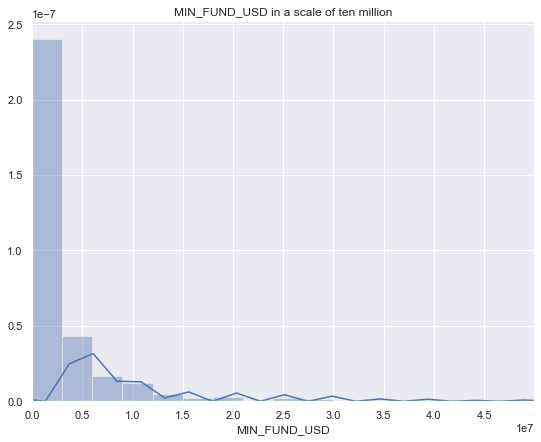

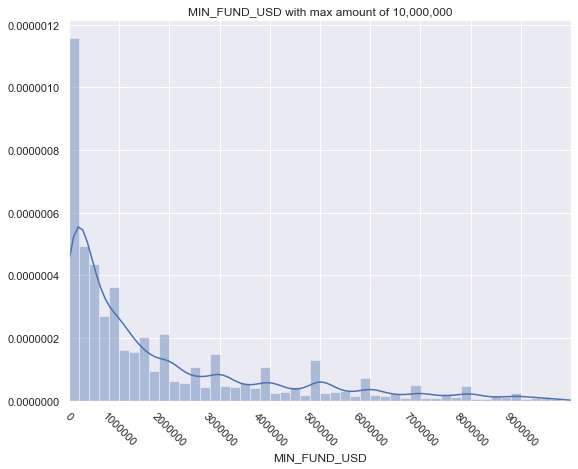

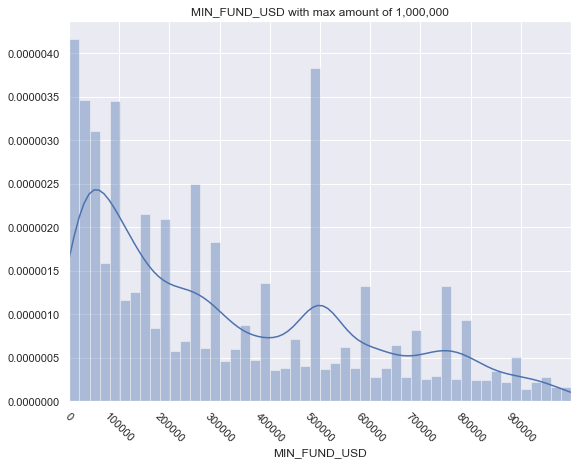



 - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -




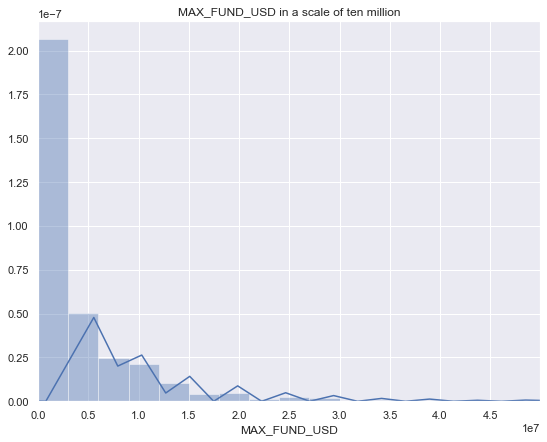

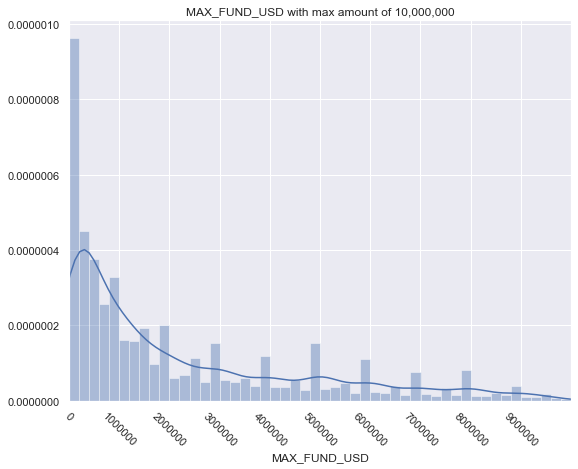

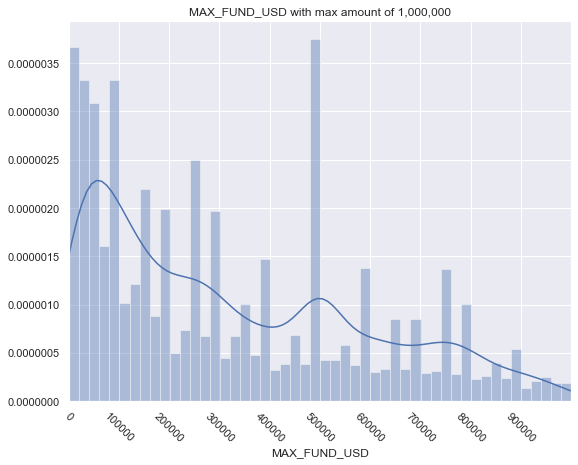



 - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -




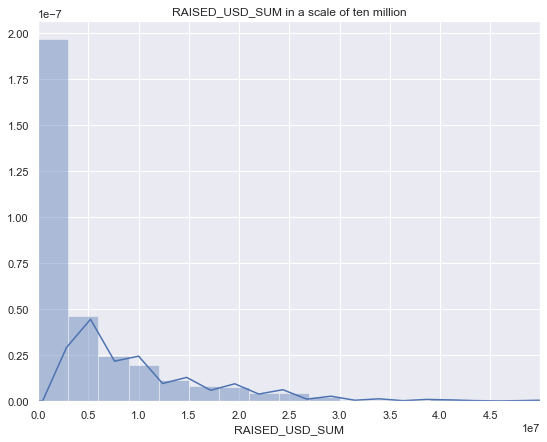

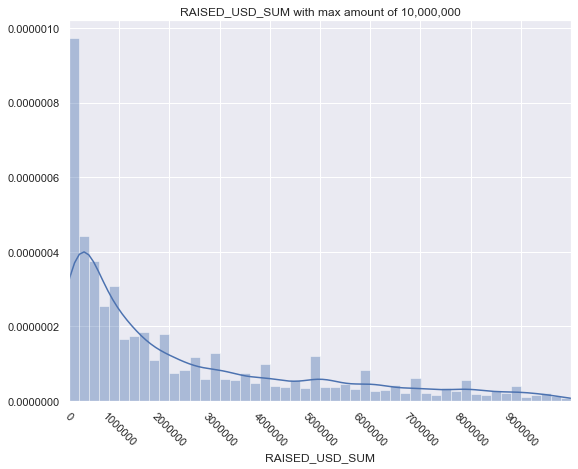

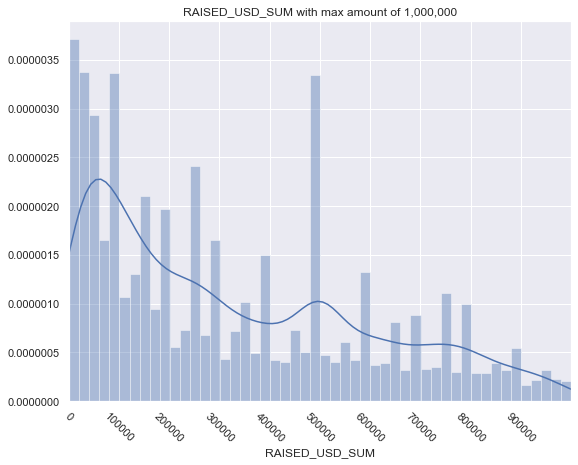



 - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -




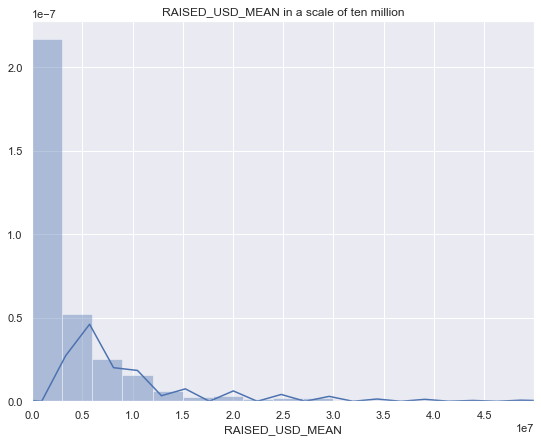

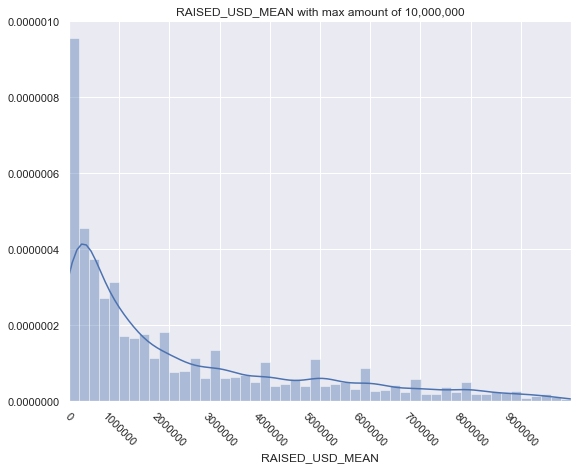

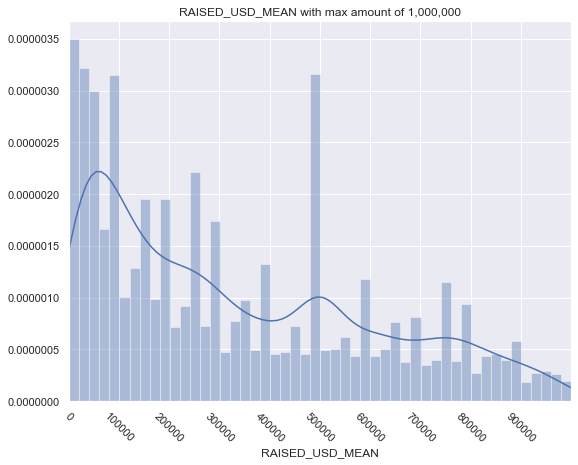



 - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -




In [148]:
DISTPLOT_LIST = ['MIN_FUND_USD','MAX_FUND_USD', 'RAISED_USD_SUM', 'RAISED_USD_MEAN']

for i in DISTPLOT_LIST:
    plt.figure(figsize=(9,7))
    plt.title(i + ' in a scale of ten million')
    sns.distplot(STARTUP_DF[i], bins=100)
    plt.xlim(0,50000000)
    plt.xticks(np.arange(0,50000000,5000000))
    plt.show()
    plt.figure(figsize=(9,7))
    plt.title(i + ' with max amount of 10,000,000')
    sns.distplot(STARTUP_DF[STARTUP_DF[i]<10000000][i], bins=50)
    plt.xlim(0,10000000)
    plt.xticks(np.arange(0,10000000,1000000) ,rotation = -45)
    plt.show()
    plt.figure(figsize=(9,7))
    plt.title(i + ' with max amount of 1,000,000')
    sns.distplot(STARTUP_DF[STARTUP_DF[i]<1000000][i], bins=50)
    plt.xlim(0,1000000)
    plt.xticks(np.arange(0,1000000,100000) ,rotation = -45)
    plt.show()
    print('\n')
    print(' - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -')
    print('\n')

<div class="alert alert-block alert-info">
    <h1> Count plot of categorical columns</h1>
    <h3> 
        There are 7 unique values of Funding Type for each funding: <br></h3><h4>
        - Series A : early stage funding, to further optimize its user base and product offerings. <br><br>
        - Series B : intermediate stage funding, to expand market reach and meet market demand. <br><br>
        - Series C : Later stage funding, to develop new products, expand markets, or acquire new companies. <br><br>
        - Angel : Private investor funding, to fund new or small startups. <br><br>
        - Venture : Pooled investment funding, to fund all kind of stage and size of startups. <br><br>
        - Post-IPO : After going public funding <br><br>
        - Other : other funding
    </h4>
</div>

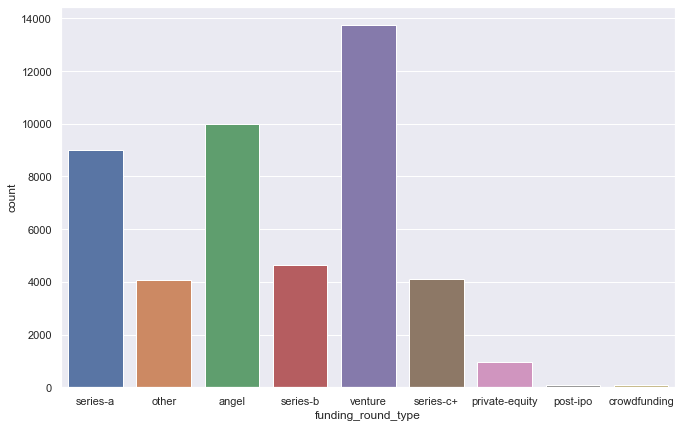

In [24]:
plt.figure(figsize=(11,7))
sns.countplot(funding['funding_round_type'])
plt.show()

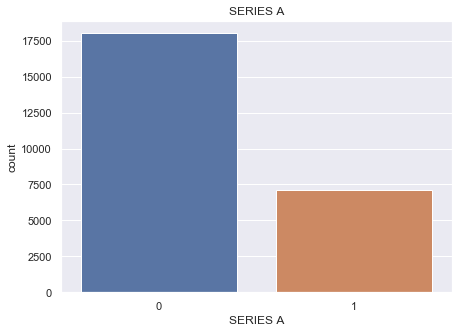

Value counts: 
0    18002
1     7080
Name: SERIES A, dtype: int64


percentage of value counts: 
0    71.772586
1    28.227414
Name: SERIES A, dtype: float64


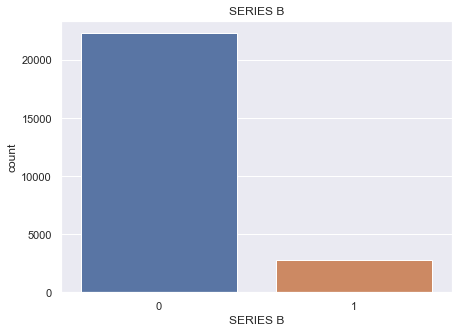

Value counts: 
0    22263
1     2819
Name: SERIES B, dtype: int64


percentage of value counts: 
0    88.760864
1    11.239136
Name: SERIES B, dtype: float64


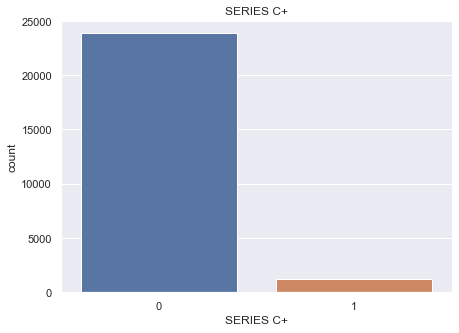

Value counts: 
0    23836
1     1246
Name: SERIES C+, dtype: int64


percentage of value counts: 
0    95.032294
1     4.967706
Name: SERIES C+, dtype: float64


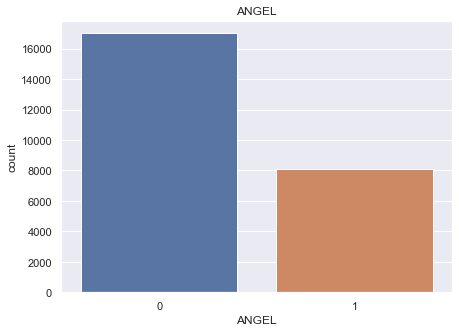

Value counts: 
0    16999
1     8083
Name: ANGEL, dtype: int64


percentage of value counts: 
0    67.773702
1    32.226298
Name: ANGEL, dtype: float64


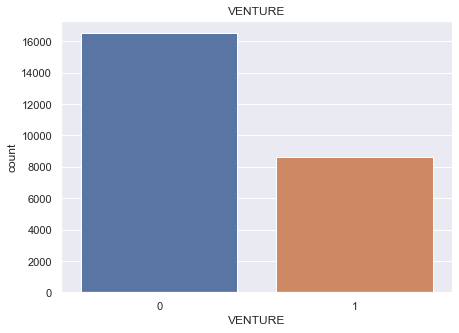

Value counts: 
0    16493
1     8589
Name: VENTURE, dtype: int64


percentage of value counts: 
0    65.756319
1    34.243681
Name: VENTURE, dtype: float64


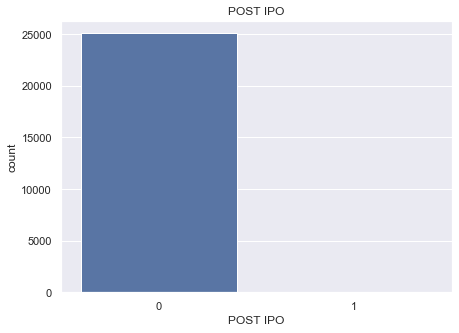

Value counts: 
0    25039
1       43
Name: POST IPO, dtype: int64


percentage of value counts: 
0    99.828562
1     0.171438
Name: POST IPO, dtype: float64


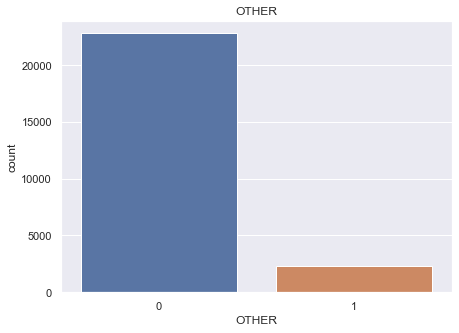

Value counts: 
0    22769
1     2313
Name: OTHER, dtype: int64


percentage of value counts: 
0    90.778247
1     9.221753
Name: OTHER, dtype: float64


In [97]:
COUNTPLOT_LIST = ['SERIES A', 'SERIES B', 'SERIES C+', 'ANGEL',
       'VENTURE', 'POST IPO', 'OTHER']

for i in COUNTPLOT_LIST:
    plt.figure(figsize=(7,5))
    plt.title(i)
    sns.countplot(STARTUP_DF[i])
    plt.show()
    print('Value counts: ')
    print(STARTUP_DF[i].value_counts())
    print('\n')
    print('percentage of value counts: ')
    print(STARTUP_DF[i].value_counts(1)*100)

<div class="alert alert-block alert-info">
    <h1> Count plot of Startup Office Country Location</h1>
</div>

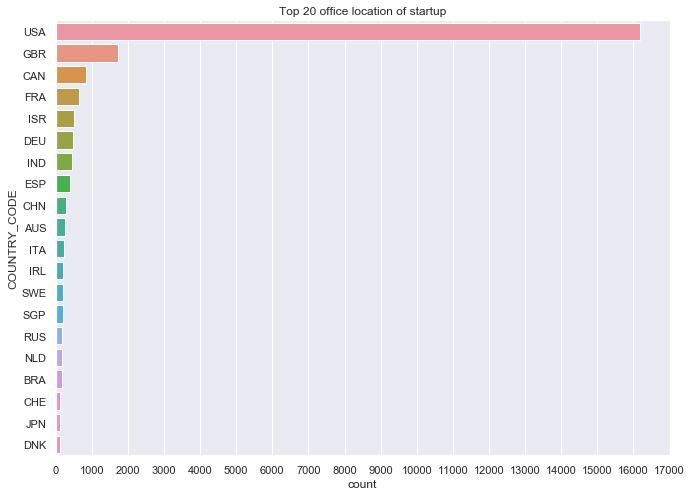

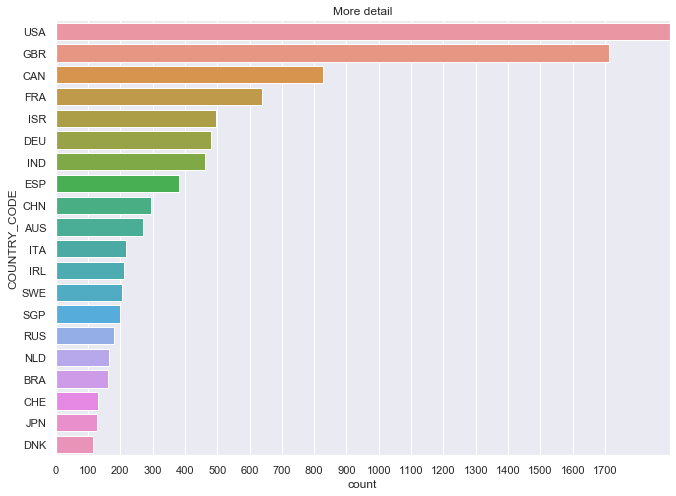

In [149]:
plt.figure(figsize=(11,8))
plt.title('Top 20 office location of startup')
sns.countplot(y = STARTUP_DF['COUNTRY_CODE'],
             order = STARTUP_DF['COUNTRY_CODE'].value_counts().iloc[:20].index)
plt.xticks(np.arange(0, 18000, 1000))
plt.show()

plt.figure(figsize=(11,8))
plt.title('More detail')
sns.countplot(y = STARTUP_DF['COUNTRY_CODE'],
             order = STARTUP_DF['COUNTRY_CODE'].value_counts().iloc[:20].index)
plt.xlim(0,1900)
plt.xticks(np.arange(0, 1800, 100))
plt.show()

In [150]:
print('Value count of office location')
print(STARTUP_DF['COUNTRY_CODE'].value_counts().head(20))
print('\n')
print('Percentage of office location')
print((STARTUP_DF['COUNTRY_CODE'].value_counts(1)*100).head(20))

Value count of office location
USA    16185
GBR     1713
CAN      827
FRA      638
ISR      495
DEU      480
IND      462
ESP      383
CHN      294
AUS      271
ITA      218
IRL      212
SWE      206
SGP      199
RUS      181
NLD      165
BRA      163
CHE      131
JPN      129
DNK      117
Name: COUNTRY_CODE, dtype: int64


Percentage of office location
USA    64.533493
GBR     6.830144
CAN     3.297448
FRA     2.543860
ISR     1.973684
DEU     1.913876
IND     1.842105
ESP     1.527113
CHN     1.172249
AUS     1.080542
ITA     0.869219
IRL     0.845295
SWE     0.821372
SGP     0.793461
RUS     0.721691
NLD     0.657895
BRA     0.649920
CHE     0.522329
JPN     0.514354
DNK     0.466507
Name: COUNTRY_CODE, dtype: float64


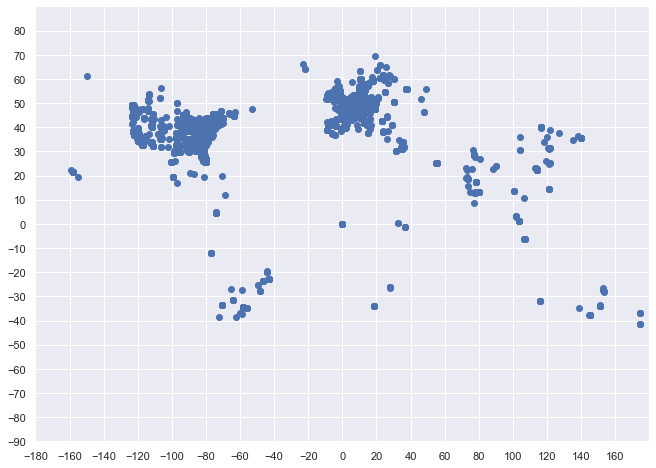

In [151]:
plt.figure(figsize=(11,8))
plt.scatter(y='LATITUDE',x='LONGITUDE',data=STARTUP_DF)
plt.ylim(-90,90)
plt.yticks(np.arange(-90,90,10))
plt.xlim(-180,180)
plt.xticks(np.arange(-180,180,20))
plt.show()

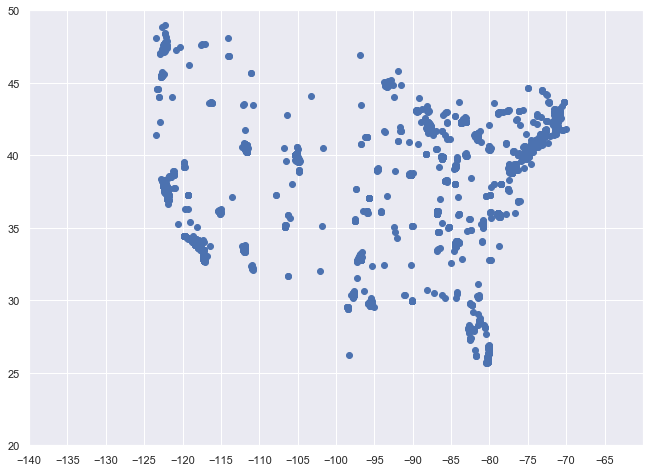

In [25]:
plt.figure(figsize=(11,8))
plt.scatter(y='LATITUDE',x='LONGITUDE',data=STARTUP_DF[STARTUP_DF['COUNTRY_CODE']=='USA'])
plt.ylim(20,50)
plt.yticks(np.arange(20,55,5))
plt.xlim(-140,-60)
plt.xticks(np.arange(-140,-60,5))
plt.show()

<div class="alert alert-block alert-info">
    <h1> Count plot of Year of each funding</h1>
</div>

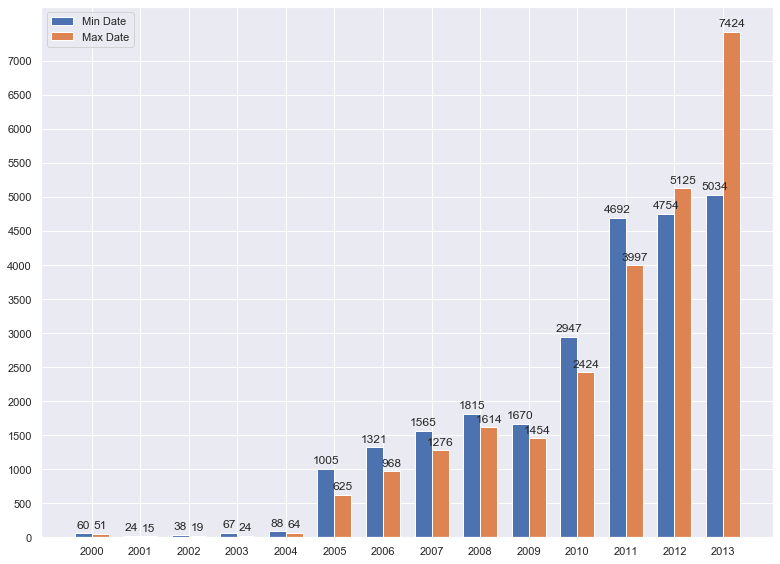

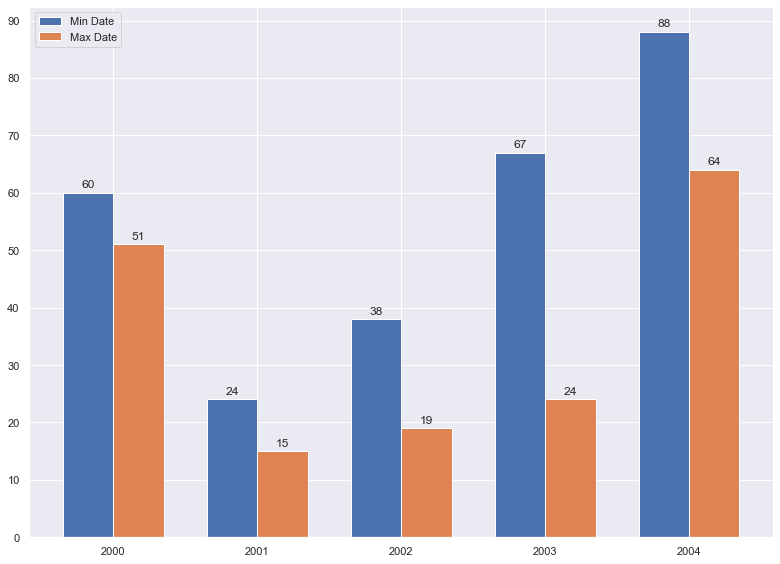

In [227]:
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

x = STARTUP_DF['MIN_DATE'].dt.year.value_counts().sort_index().index
width = 0.35

fig,ax = plt.subplots(figsize=(11,8))
box1 = ax.bar(x - width/2, STARTUP_DF['MIN_DATE'].dt.year.value_counts().sort_index().values, width, label = 'Min Date')
box2 = ax.bar(x + width/2, STARTUP_DF['MAX_DATE'].dt.year.value_counts().sort_index().values, width, label = 'Max Date')
ax.set_xticks(x)
ax.set_yticks(np.arange(0,7500,500))
ax.legend()
autolabel(box1)
autolabel(box2)
plt.tight_layout()
plt.show()

x = STARTUP_DF['MIN_DATE'].dt.year.value_counts().sort_index().head(5).index
width = 0.35

fig,ax = plt.subplots(figsize=(11,8))
box1 = ax.bar(x - width/2, STARTUP_DF['MIN_DATE'].dt.year.value_counts().sort_index().head(5).values, width, label = 'Min Date')
box2 = ax.bar(x + width/2, STARTUP_DF['MAX_DATE'].dt.year.value_counts().sort_index().head(5).values, width, label = 'Max Date')
ax.set_xticks(x)
ax.set_yticks(np.arange(0,100,10))
ax.legend()
autolabel(box1)
autolabel(box2)
plt.tight_layout()
plt.show()

In [230]:
print('Min Date')
print(STARTUP_DF['MIN_DATE'].dt.year.value_counts().sort_index())
print('\n')
print('Percentage of Min Date')
print(STARTUP_DF['MIN_DATE'].dt.year.value_counts(1).sort_index()*100)
print('- - - - - - - - - - - -')
print('Max Date')
print(STARTUP_DF['MAX_DATE'].dt.year.value_counts().sort_index())
print('\n')
print('Percentage of Max Date')
print(STARTUP_DF['MAX_DATE'].dt.year.value_counts(1).sort_index()*100)

Min Date
2000      60
2001      24
2002      38
2003      67
2004      88
2005    1005
2006    1321
2007    1565
2008    1815
2009    1670
2010    2947
2011    4692
2012    4754
2013    5034
Name: MIN_DATE, dtype: int64


Percentage of Min Date
2000     0.239234
2001     0.095694
2002     0.151515
2003     0.267145
2004     0.350877
2005     4.007177
2006     5.267145
2007     6.240032
2008     7.236842
2009     6.658692
2010    11.750399
2011    18.708134
2012    18.955343
2013    20.071770
Name: MIN_DATE, dtype: float64
- - - - - - - - - - - -
Max Date
2000      51
2001      15
2002      19
2003      24
2004      64
2005     625
2006     968
2007    1276
2008    1614
2009    1454
2010    2424
2011    3997
2012    5125
2013    7424
Name: MAX_DATE, dtype: int64


Percentage of Max Date
2000     0.203349
2001     0.059809
2002     0.075758
2003     0.095694
2004     0.255183
2005     2.492026
2006     3.859649
2007     5.087719
2008     6.435407
2009     5.797448
2010     9.665072
2011 

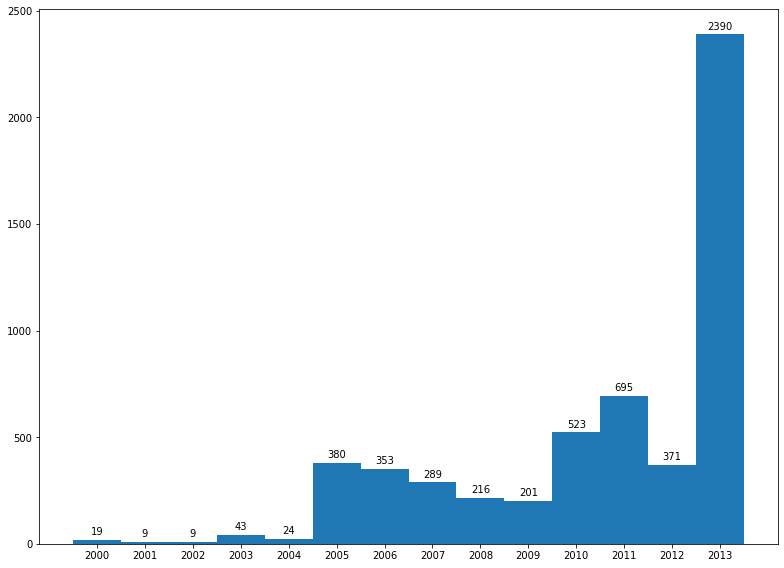

In [8]:
def autolabel1(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width()/2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

minmax = STARTUP_DF['MIN_DATE'].dt.year.value_counts().sort_index().values - STARTUP_DF['MAX_DATE'].dt.year.value_counts().sort_index().values
maxmin = STARTUP_DF['MAX_DATE'].dt.year.value_counts().sort_index().values - STARTUP_DF['MIN_DATE'].dt.year.value_counts().sort_index().values

a = minmax[:12]
b = maxmin[12:]
c = np.concatenate((a, b))

x = STARTUP_DF['MIN_DATE'].dt.year.value_counts().sort_values().index
width = 1

fig,ax = plt.subplots(figsize=(11,8))
box = ax.bar(x, c, width)
ax.set_xticks(x)
autolabel1(box)
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-info">
    <h1> Count plot of Startup Funding</h1>
</div>

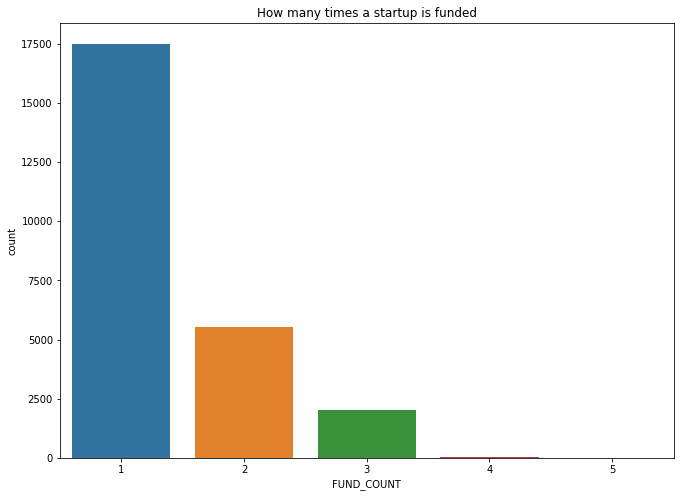

In [11]:
plt.figure(figsize=(11,8))
plt.title('How many times a startup is funded')
sns.countplot(STARTUP_DF['FUND_COUNT'])
plt.show()

<div class="alert alert-block alert-warning">
    <h1> Next Step: Data Modeling and Clustering Description